# importar librerias

In [1]:
import requests as req
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

# obtener los datos

In [2]:
html = req.get("https://www.worldometers.info/coronavirus/")

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<li
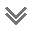

In [3]:
html.content # verifica que se guardo el contenido

# analisisid del contenido html

In [4]:
# analisis de html
html_parsed = BeautifulSoup(html.content)

In [5]:
# buscar la tabla requerida

table = html_parsed.find("table", attrs={"id": "main_table_countries_today"})

In [6]:
# se verifica el resultado

table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br>Cases</br></th>
<th width="30">Serious,<br>Critical</br></th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="

In [7]:
# obtener todas las columnas

rows = table.find_all("tr")

In [8]:
rows[0]

<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br>Cases</br></th>
<th width="30">Serious,<br>Critical</br></th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

In [9]:
rows[0].text.strip()

'#\nCountry,Other\nTotalCases\nNewCases\nTotalDeaths\nNewDeaths\nTotalRecovered\nNewRecovered\nActiveCases\nSerious,Critical\nTot\xa0Cases/1M pop\nDeaths/1M pop\nTotalTests\nTests/\n1M pop\n\nPopulation\nContinent\n1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl\nNew Cases/1M pop\nNew Deaths/1M pop\nActive Cases/1M pop'

In [10]:
# token
rows[2].text.strip().split("\n")

['Asia',
 '',
 '221,305,918',
 '+617',
 '1,552,540',
 '+3',
 '205,445,802',
 '+6,251',
 '14,307,576',
 '14,765',
 '',
 '',
 '',
 '',
 '',
 'Asia']

# 3 Store data

In [11]:
# store rows into list (data)

data = []
for x in rows:
    data.append(x.text.strip().split()[1:5])  # get only first 9 columns

In [12]:
# convert list into DataFrame
df = pd.DataFrame(data)

In [13]:
# checar el dataframe
df.head()

,0,1,2,3
0,"Country,Other",TotalCases,NewCases,TotalDeaths
1,America,"130,450,025","1,666,328","125,878,206"
2,"221,305,918",+617,"1,552,540",+3
3,"252,732,883","+4,686","2,093,099",+99
4,America,"69,513,937","1,364,361",+8


In [15]:
# priimeras filas como encabezados
df = pd.DataFrame(data[9:], columns=data[0])

In [16]:
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths
0,USA,"110,462,560","1,191,815","108,144,870"
1,India,"45,020,942",+609,"533,412"
2,France,"40,138,560","167,642","39,970,918"
3,Germany,"38,790,256","+1,560","180,956"
4,Brazil,"38,230,814","708,739",+8


In [17]:
# guardar en csv
df.to_csv('covid19.csv')

# 4 visualizacion 

In [19]:
# obtener las columnas requeridas

df_plot = df[["Country,Other", "TotalCases"]]

# obtener las primeras 10 columnas

df_plot = df_plot[:10]

In [20]:
# veerificar el dataframe

df_plot.head()

,"Country,Other",TotalCases
0,USA,"110,462,560"
1,India,"45,020,942"
2,France,"40,138,560"
3,Germany,"38,790,256"
4,Brazil,"38,230,814"


In [23]:
# remover las comas y convertir cadenas a enteros

df_plot["TotalCases"] = df_plot["TotalCases"].apply(
    lambda x: int(x.replace(",", "")) if x.replace(",", "").isdigit() else None
)

In [24]:
# verificar el dataframe

df_plot.head()

,"Country,Other",TotalCases
0,USA,110462560.0
1,India,45020942.0
2,France,40138560.0
3,Germany,38790256.0
4,Brazil,38230814.0


<Axes: xlabel='Country,Other'>

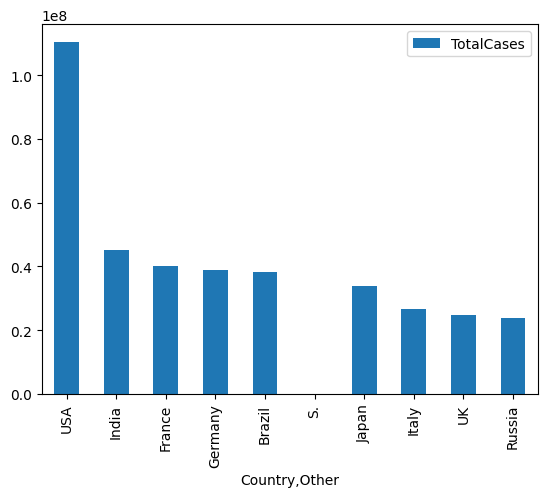

In [25]:
# plot

df_plot.plot(kind="bar", x="Country,Other", y="TotalCases")